In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
import time
from LandMPC_template.MPCLandControl import MPCLandControl
from src.rocket import Rocket, perturb_rocket
from src.pos_rocket_vis import *

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir,"rocket.yaml")

# Rocket setup
Ts  = 1/20
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7 # Do not change!!!

# Visualization setup
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1

Linearization around a steady state:
x_ref =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]
self.A shape: (2, 2)
self.B shape: (2, 1)
xs_z shape: (2,)
us_z shape: (1,)
xs [0. 3.]
us [56.66666667]
Qf = [[ 640.93069242  243.78429594]
 [ 243.78429594 3262.06606807]]
Closed-loop eigvals: [0.51802395 0.97449047]
Bd [[0.00865235]
 [0.00021631]]
Minimal robust invariant set computation converged after 1 iterations.


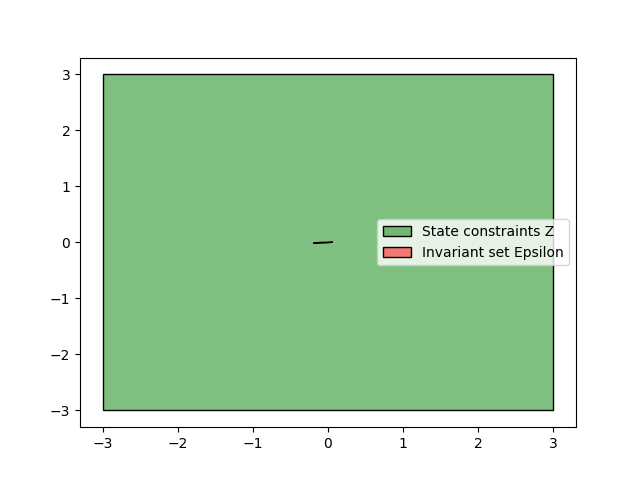

Vertices of the tightened input constraint U~: [-5.12079871 19.48471066]


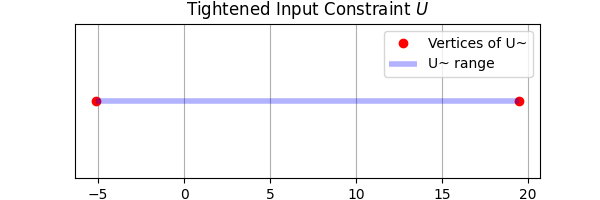

Z contains origin: True
Z_tilde contains origin: True
U_tilde empty: False
Xf contains origin: True
U_tilde contains zero: True


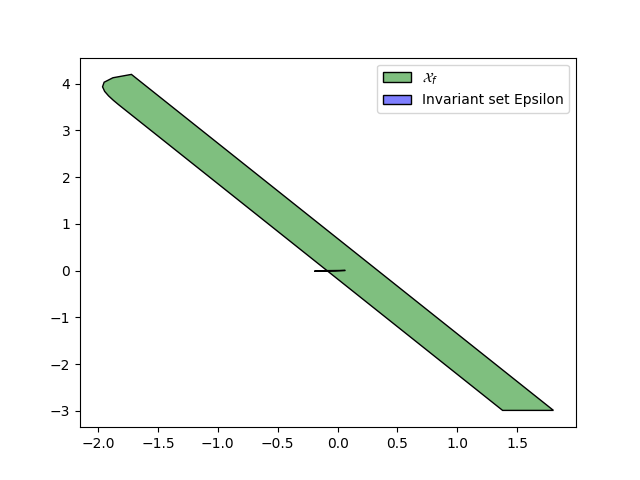

selfQf = [[ 640.93069242  243.78429594]
 [ 243.78429594 3262.06606807]]


In [4]:
sim_time = 10 # simulation length in seconds
x0 = np.array([0, 0, 0, np.deg2rad(30), 0, 0, 0, 0, 0, 3.0, 2.0, 10.0]) # w, phi, v, p
x_ref = np.array([0.]*9 + [1., 0., 3.])
xs, us = rocket.trim(x_ref)
print("Linearization around a steady state:")
print("x_ref = ", x_ref)
print("xs = ", xs)
print("us = ", us)
A, B = rocket.linearize(xs, us)

# MPC parameters
H = 40
# Merge four linear mpc
mpc = MPCLandControl().new_controller(rocket, Ts, H, x_ref=x_ref)

In [5]:
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol = rocket.simulate_land(mpc, sim_time, H, x0)
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs)

Simulating time 0.00


IndexError: index 4 is out of bounds for axis 0 with size 4